In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from teleconnections import Teleconnection

In [3]:
model = 'ERA5'
exp = 'era5'
source = 'monthly'

In [16]:
tc = Teleconnection(model, exp, source, 'ENSO', loglevel='INFO')

2023-10-13 16:15:23 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-10-13 16:15:23 :: Teleconnection :: INFO     -> Be sure that the data is already regridded
2023-10-13 16:15:23 :: Teleconnection :: WARNING  -> No time aggregation will be performed
2023-10-13 16:15:23 :: Teleconnection :: INFO     -> Be sure that the data is already monthly aggregated


2023-10-13 16:15:24 :: Teleconnection :: INFO     -> Namelist loaded
2023-10-13 16:15:24 :: Reader :: INFO     -> Fixes found for model ERA5, experiment era5, source monthly
2023-10-13 16:15:24 :: Reader :: INFO     -> For source monthly, method for fixes is: replace
2023-10-13 16:15:24 :: yaml :: INFO     -> Updating the log_level to INFO
2023-10-13 16:15:24 :: Reader :: INFO     -> Data model: /project/project_465000454/nurissom/AQUA/config/data_models/cf2cds.json
2023-10-13 16:15:24 :: Teleconnection :: INFO     -> Reader initialized


In [20]:
tc.evaluate_regression(rebuild=True)

2023-10-13 16:21:06 :: Teleconnection :: WARNING  -> No index has been calculated, trying to calculate
2023-10-13 16:21:06 :: regional mean anomalies :: INFO     -> Evaluating regional mean anomalies for ENSO


/LUMI_TYKKY_VmuK8Pk/miniconda/envs/env1/lib/python3.11/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]
2023-10-13 16:21:44 :: regional mean anomalies :: INFO     -> Index evaluated


In [27]:
import os

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from teleconnections.plots import plot_box, add_cyclic_lon, evaluate_colorbar_limits

In [13]:
tc.regression

<xarray.DataArray 'sst' (lat: 721, lon: 1440)>
dask.array<truediv, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:  Sea surface temperature
    units:      K
    code:       34
    table:      128
    history:    2023-10-13 16:10:56 variable renamed by AQUA fixer;\n
    paramId:    34
    cfVarName:  sst
    shortName:  sst

In [36]:
# load data to be plot:
data = tc.regression.load()

In [41]:
from teleconnections.plots import plot_single_map

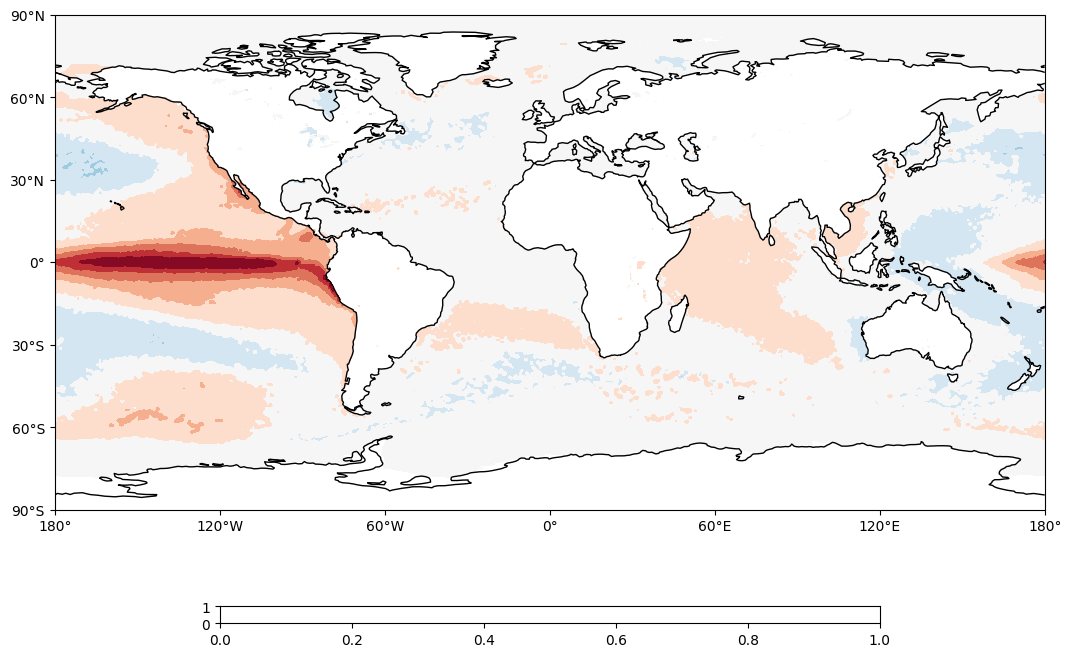

In [45]:
plot_single_map(data)